# Import Packages

In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

In [2]:
class_names = ['Bacterial Pneumonia','Corona Virus Disease','Normal','Tuberculosis','Viral Pneumonia']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

# Loading the Data
We have to write a load_data function that load the images and the labels from the folder.

In [3]:
def load_data():
    datasets = [r'D:\Projects\HealthPulse  Data Driven strategies for Healthcare Optimization\lungs\train', r'D:\Projects\HealthPulse  Data Driven strategies for Healthcare Optimization\lungs\test']
    
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [4]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading D:\Projects\HealthPulse  Data Driven strategies for Healthcare Optimization\lungs\train


100%|██████████████████████████████████████████████████████████████████████████████| 1204/1204 [00:47<00:00, 25.34it/s]


Loading D:\Projects\HealthPulse  Data Driven strategies for Healthcare Optimization\lungs\test


100%|████████████████████████████████████████████████████████████████████████████████| 403/403 [00:15<00:00, 25.83it/s]


In [5]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [6]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 6054
Number of testing examples: 2025
Each image is of size: (150, 150)


In [7]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(11, activation=tf.nn.softmax)
])

In [9]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(train_images, train_labels, batch_size=256, epochs=20, validation_split = 0.2)

Epoch 1/20
19/19 [==============================] - 76s 4s/step - loss: 1.8068 - accuracy: 0.4072 - val_loss: 0.9000 - val_accuracy: 0.6606
Epoch 2/20
19/19 [==============================] - 74s 4s/step - loss: 0.7584 - accuracy: 0.6971 - val_loss: 0.7286 - val_accuracy: 0.7060
Epoch 3/20
19/19 [==============================] - 73s 4s/step - loss: 0.6050 - accuracy: 0.7588 - val_loss: 0.6402 - val_accuracy: 0.7341
Epoch 4/20
19/19 [==============================] - 74s 4s/step - loss: 0.5534 - accuracy: 0.7753 - val_loss: 0.6235 - val_accuracy: 0.7490
Epoch 5/20
19/19 [==============================] - 71s 4s/step - loss: 0.4977 - accuracy: 0.7979 - val_loss: 0.6089 - val_accuracy: 0.7614
Epoch 6/20
19/19 [==============================] - 73s 4s/step - loss: 0.4939 - accuracy: 0.8061 - val_loss: 0.6535 - val_accuracy: 0.7382
Epoch 7/20
19/19 [==============================] - 135s 7s/step - loss: 0.4435 - accuracy: 0.8222 - val_loss: 0.5657 - val_accuracy: 0.7729
Epoch 8/20
19/19 [=

In [11]:
test_loss = model.evaluate(test_images, test_labels)

64/64 [==============================] - 10s 159ms/step - loss: 0.6594 - accuracy: 0.7807


64/64 [==============================] - 10s 145ms/step


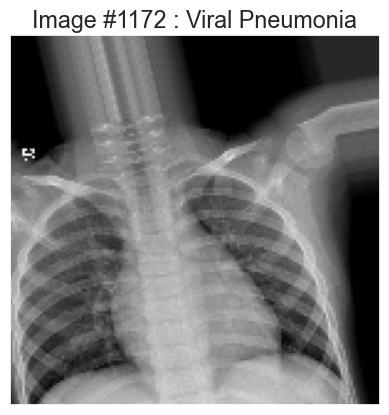

In [12]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability


index = np.random.randint(test_images.shape[0])
plt.figure()
plt.imshow(test_images[index])
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Image #{} : '.format(index) + class_names[pred_labels[index]])
plt.show()

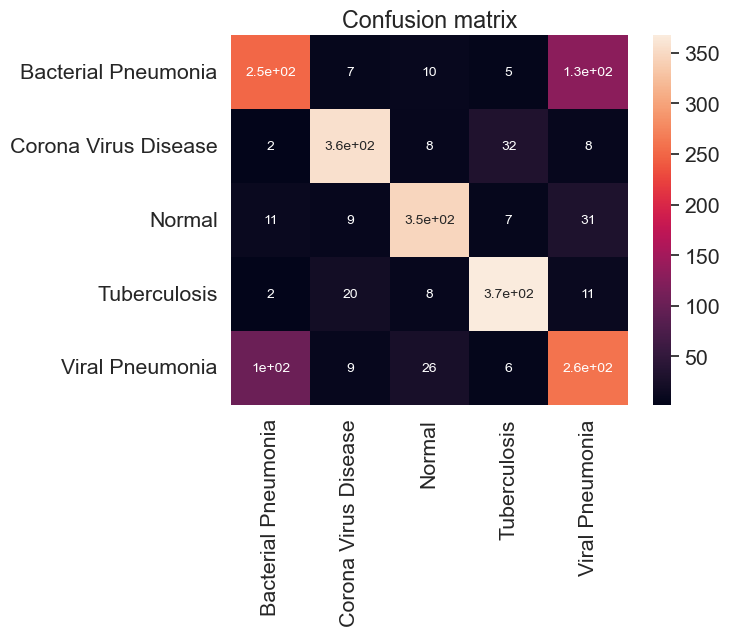

In [13]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [14]:
import joblib

In [15]:
model.save_weights("model_lung_scan.h5")

In [16]:
model_json=model.to_json()
with open("lung_scan.json", "w") as json_file:
    json_file.write(model_json)